In [376]:
# Load necessary libraries


import requests
from IPython.core.display import HTML
from imdbpie import Imdb
import json
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing


# from bs4 import BeautifulSoup
import urllib


In [377]:
# Get data on top 250 movies

imdb = Imdb()
imdb = Imdb(anonymize=True) # to proxy requests

imdb.top_250()

[{u'can_rate': True,
  u'image': {u'height': 1388,
   u'url': u'https://images-na.ssl-images-amazon.com/images/M/MV5BODU4MjU4NjIwNl5BMl5BanBnXkFtZTgwMDU2MjEyMDE@._V1_.jpg',
   u'width': 933},
  u'num_votes': 1722798,
  u'rating': 9.3,
  u'tconst': u'tt0111161',
  u'title': u'The Shawshank Redemption',
  u'type': u'feature',
  u'year': u'1994'},
 {u'can_rate': True,
  u'image': {u'height': 1129,
   u'url': u'https://images-na.ssl-images-amazon.com/images/M/MV5BNTUxOTdjMDMtMWY1MC00MjkxLTgxYTMtYTM1MjU5ZTJlNTZjXkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_.jpg',
   u'width': 798},
  u'num_votes': 1177393,
  u'rating': 9.2,
  u'tconst': u'tt0068646',
  u'title': u'The Godfather',
  u'type': u'feature',
  u'year': u'1972'},
 {u'can_rate': True,
  u'image': {u'height': 1140,
   u'url': u'https://images-na.ssl-images-amazon.com/images/M/MV5BNDVjZjgxNTgtMGNhMC00YWU0LTg0YTQtNTkxNzBjMDBkNWYyXkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_.jpg',
   u'width': 800},
  u'num_votes': 807091,
  u'rating': 9,
  u'tconst': u'tt0071

In [378]:
# run api to get top 250 movie id numbers

def get_top_250():
    response = requests.get('http://www.imdb.com/chart/top')
    html = response.text
    entries = re.findall("<a href.*?/title/(.*?)/", html)
    return list(set(entries))


In [379]:
entries = get_top_250()

In [380]:
# verify there are 250
len(entries)

250

In [381]:
# verify we're getting a movie id number back
entries[0]

u'tt2582802'

In [382]:
# function to get the data for the movie id numbers captured in prior function

def get_entry(entry):
    res = requests.get('http://www.omdbapi.com/?i='+entry)
    if res.status_code != 200:
        print entry, res.status_code
    else:
        print '.',
    try:
        j = json.loads(res.text)
    except ValueError:
        j = None
    return j

In [383]:
#run get_entry function

entries_dict_list = [get_entry(e) for e in entries]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [384]:
# create a dataframe from the results of get_entry

df = pd.DataFrame(entries_dict_list)

In [385]:
# check the df out

df.head(3)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Miles Teller, J.K. Simmons, Paul Reiser, Melis...",Won 3 Oscars. Another 87 wins & 131 nominations.,USA,Damien Chazelle,"Drama, Music",English,88,A promising young drummer enrolls at a cut-thr...,https://images-na.ssl-images-amazon.com/images...,R,15 Oct 2014,True,107 min,Whiplash,movie,Damien Chazelle,2014,tt2582802,8.5,"413,720"
1,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",Nominated for 2 Oscars. Another 5 wins & 6 nom...,Japan,Akira Kurosawa,"Action, Adventure, Drama",Japanese,98,A poor village under attack by bandits recruit...,https://images-na.ssl-images-amazon.com/images...,UNRATED,19 Nov 1956,True,207 min,Seven Samurai,movie,"Akira Kurosawa (screenplay), Shinobu Hashimoto...",1954,tt0047478,8.7,"232,249"
2,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",Won 4 Oscars. Another 30 wins & 23 nominations.,USA,Steven Spielberg,"Action, Adventure","English, German, Hebrew, Spanish, Arabic, Nepali",85,Archaeologist and adventurer Indiana Jones is ...,https://images-na.ssl-images-amazon.com/images...,PG,12 Jun 1981,True,115 min,Raiders of the Lost Ark,movie,"Lawrence Kasdan (screenplay), George Lucas (st...",1981,tt0082971,8.5,"671,034"


In [386]:
# check the df's counts and dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
Actors        250 non-null object
Awards        250 non-null object
Country       250 non-null object
Director      250 non-null object
Genre         250 non-null object
Language      250 non-null object
Metascore     250 non-null object
Plot          250 non-null object
Poster        250 non-null object
Rated         250 non-null object
Released      250 non-null object
Response      250 non-null object
Runtime       250 non-null object
Title         250 non-null object
Type          250 non-null object
Writer        250 non-null object
Year          250 non-null object
imdbID        250 non-null object
imdbRating    250 non-null object
imdbVotes     250 non-null object
dtypes: object(20)
memory usage: 39.1+ KB


In [387]:
# function to get gross 

def get_gross(entry):
    response = requests.get('http://www.imdb.com/title/'+entry)
    html = response.text
    try:
        gross_list = re.findall("Gross:</h4>[ ]*\$([^ ]*)", html)
        gross = int(gross_list[0].replace(',', ''))
        print '.',
        return gross
    except Exception as ex:
        print
        print ex, entry, response.status_code
        return None

In [388]:
# run gross function

grosses = [(e, get_gross(e)) for e in entries]

. . . . . . .
list index out of range tt0046268 200

list index out of range tt0055630 200
. . . . .
list index out of range tt0057115 200
.
list index out of range tt0071315 200
. . . .
list index out of range tt0074896 200
. .
list index out of range tt0021749 200
. .
list index out of range tt0053125 200
. . .
list index out of range tt1220719 200

list index out of range tt0025316 200
. .
list index out of range tt0083922 200
. . .
list index out of range tt0072684 200
.
list index out of range tt0074958 200
. . . .
list index out of range tt0036775 200
. . . . . .
list index out of range tt0978762 200
. .
list index out of range tt0080678 200
. .
list index out of range tt0056592 200
.
list index out of range tt0095327 200
. . . . . . . . .
list index out of range tt0046438 200
.
list index out of range tt0015864 200
.
list index out of range tt0045152 200
. . . .
list index out of range tt0046911 200
.
list index out of range tt0050986 200
.
list index out of range tt0091251 200


In [389]:
# create new df with movie id and Gross

df1 = pd.DataFrame(grosses, columns=['imdbID', 'Gross'])

df1.head()

,imdbID,Gross
0,tt2582802,13092000.0
1,tt0047478,269061.0
2,tt0082971,242374454.0
3,tt0050212,27200000.0
4,tt0848228,623279547.0


In [390]:
#replace N/As with nans, then verifying

df = df.replace('N/A', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
Actors        250 non-null object
Awards        246 non-null object
Country       250 non-null object
Director      250 non-null object
Genre         250 non-null object
Language      249 non-null object
Metascore     169 non-null object
Plot          250 non-null object
Poster        248 non-null object
Rated         249 non-null object
Released      249 non-null object
Response      250 non-null object
Runtime       250 non-null object
Title         250 non-null object
Type          250 non-null object
Writer        250 non-null object
Year          250 non-null object
imdbID        250 non-null object
imdbRating    250 non-null object
imdbVotes     250 non-null object
dtypes: object(20)
memory usage: 39.1+ KB


In [391]:
# change dtype of Rleased column to datetime

df.Released = pd.to_datetime(df.Released)

In [392]:
# take out "min" from runtime so it can be converted to int, then convert

def intminutes(x):
    y = x.replace('min', '').strip()
    return int(y)

df.Runtime = df.Runtime.apply(intminutes)

In [393]:
# change Year to int

df.Year = df.Year.astype(int)

In [394]:
# change Metascore to int

df.Metascore = df.Metascore.astype(float)

In [395]:
# change imdb rating to float

df.imdbRating = df.imdbRating.astype(float)

In [396]:
# function to strip commas out of vote counts and convert the result to int, then running the function n df

def intvotes(x):
    y = x.replace(',', '').strip()
    return int(y)
df.imdbVotes = df.imdbVotes.apply(intvotes)

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
Actors        250 non-null object
Awards        246 non-null object
Country       250 non-null object
Director      250 non-null object
Genre         250 non-null object
Language      249 non-null object
Metascore     169 non-null float64
Plot          250 non-null object
Poster        248 non-null object
Rated         249 non-null object
Released      249 non-null datetime64[ns]
Response      250 non-null object
Runtime       250 non-null int64
Title         250 non-null object
Type          250 non-null object
Writer        250 non-null object
Year          250 non-null int64
imdbID        250 non-null object
imdbRating    250 non-null float64
imdbVotes     250 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(14)
memory usage: 39.1+ KB


In [398]:
# bring gross data into main df

df = pd.merge(df, df1)

In [399]:
df.head(3)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,...,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes,Gross
0,"Miles Teller, J.K. Simmons, Paul Reiser, Melis...",Won 3 Oscars. Another 87 wins & 131 nominations.,USA,Damien Chazelle,"Drama, Music",English,88.0,A promising young drummer enrolls at a cut-thr...,https://images-na.ssl-images-amazon.com/images...,R,...,True,107,Whiplash,movie,Damien Chazelle,2014,tt2582802,8.5,413720,13092000.0
1,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",Nominated for 2 Oscars. Another 5 wins & 6 nom...,Japan,Akira Kurosawa,"Action, Adventure, Drama",Japanese,98.0,A poor village under attack by bandits recruit...,https://images-na.ssl-images-amazon.com/images...,UNRATED,...,True,207,Seven Samurai,movie,"Akira Kurosawa (screenplay), Shinobu Hashimoto...",1954,tt0047478,8.7,232249,269061.0
2,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",Won 4 Oscars. Another 30 wins & 23 nominations.,USA,Steven Spielberg,"Action, Adventure","English, German, Hebrew, Spanish, Arabic, Nepali",85.0,Archaeologist and adventurer Indiana Jones is ...,https://images-na.ssl-images-amazon.com/images...,PG,...,True,115,Raiders of the Lost Ark,movie,"Lawrence Kasdan (screenplay), George Lucas (st...",1981,tt0082971,8.5,671034,242374454.0


In [400]:
# dummy out genres into new df

cv = CountVectorizer()
data = cv.fit_transform(df.Genre).todense()
columns = ['genre_'+c for c in cv.get_feature_names()]
genredf = pd.DataFrame(data, columns=columns)
genredf.head()

,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_drama,genre_family,genre_fantasy,genre_fi,...,genre_music,genre_musical,genre_mystery,genre_noir,genre_romance,genre_sci,genre_sport,genre_thriller,genre_war,genre_western
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [401]:
# bring dummied genres into main df

df = pd.concat([df, genredf], axis = 1)

In [402]:
# dummy out actors into new df

cv = CountVectorizer(token_pattern=u'(?u)\\w+\.?\\w?\.? \\w+')
data = cv.fit_transform(df.Actors).todense()
columns = ['actor: '+c for c in cv.get_feature_names()]
actorsdf = pd.DataFrame(data, columns=columns)
actorsdf.head()

,actor: aamir khan,actor: aaron eckhart,actor: abdel ahmed,actor: adam baldwin,actor: adam driver,actor: adolphe menjou,actor: adrien brody,actor: agnes moorehead,actor: ahney her,actor: akemi yamaguchi,...,actor: woody harrelson,actor: xolani mali,actor: yacef saadi,actor: yoshiko shinohara,actor: yukiko shimazaki,actor: yves montand,actor: yôko tsukasa,actor: zach grenier,actor: zoe saldana,actor: álvaro guerrero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [403]:
# check what is in the Actors column in the main df - multiple names.

df.Actors[0]

u'Miles Teller, J.K. Simmons, Paul Reiser, Melissa Benoist'

In [404]:
# split multiple actors in actor df into multiple columns

actorsdf.loc[0,actorsdf.iloc[0] != 0]

actor: j.k. simmons       1
actor: melissa benoist    1
actor: miles teller       1
actor: paul reiser        1
Name: 0, dtype: int64

In [405]:
# bring actors df into main df

df = pd.concat([df, actorsdf], axis = 1)

In [406]:
#remove poster, awards, genre, actors,plot columns from df
df.pop('Awards')
df.pop('Plot')
df.pop('Genre')
df.pop('Actors')
df.pop('Poster');

In [407]:
df.head()

,Country,Director,Language,Metascore,Rated,Released,Response,Runtime,Title,Type,...,actor: woody harrelson,actor: xolani mali,actor: yacef saadi,actor: yoshiko shinohara,actor: yukiko shimazaki,actor: yves montand,actor: yôko tsukasa,actor: zach grenier,actor: zoe saldana,actor: álvaro guerrero
0,USA,Damien Chazelle,English,88.0,R,2014-10-15,True,107,Whiplash,movie,...,0,0,0,0,0,0,0,0,0,0
1,Japan,Akira Kurosawa,Japanese,98.0,UNRATED,1956-11-19,True,207,Seven Samurai,movie,...,0,0,0,0,1,0,0,0,0,0
2,USA,Steven Spielberg,"English, German, Hebrew, Spanish, Arabic, Nepali",85.0,PG,1981-06-12,True,115,Raiders of the Lost Ark,movie,...,0,0,0,0,0,0,0,0,0,0
3,"UK, USA",David Lean,"English, Japanese, Thai",NaN,PG,1957-12-14,True,161,The Bridge on the River Kwai,movie,...,0,0,0,0,0,0,0,0,0,0
4,USA,Joss Whedon,"English, Russian",69.0,PG-13,2012-05-04,True,143,The Avengers,movie,...,0,0,0,0,0,0,0,0,0,0


In [408]:

def check_ratings(x):
    rl = str(x)
    if rl == "PG-13":
        return 2
    elif rl == "G":
        return 0
    elif rl=="PG":
        return 1
    elif rl=="R":
        return 3
    elif rl=="X":
        return 4

    else:
        return 5
    
df['RateCode'] = df['Rated'].apply(check_ratings);

In [409]:

df.head()

,Country,Director,Language,Metascore,Rated,Released,Response,Runtime,Title,Type,...,actor: xolani mali,actor: yacef saadi,actor: yoshiko shinohara,actor: yukiko shimazaki,actor: yves montand,actor: yôko tsukasa,actor: zach grenier,actor: zoe saldana,actor: álvaro guerrero,RateCode
0,USA,Damien Chazelle,English,88.0,R,2014-10-15,True,107,Whiplash,movie,...,0,0,0,0,0,0,0,0,0,3
1,Japan,Akira Kurosawa,Japanese,98.0,UNRATED,1956-11-19,True,207,Seven Samurai,movie,...,0,0,0,1,0,0,0,0,0,5
2,USA,Steven Spielberg,"English, German, Hebrew, Spanish, Arabic, Nepali",85.0,PG,1981-06-12,True,115,Raiders of the Lost Ark,movie,...,0,0,0,0,0,0,0,0,0,1
3,"UK, USA",David Lean,"English, Japanese, Thai",NaN,PG,1957-12-14,True,161,The Bridge on the River Kwai,movie,...,0,0,0,0,0,0,0,0,0,1
4,USA,Joss Whedon,"English, Russian",69.0,PG-13,2012-05-04,True,143,The Avengers,movie,...,0,0,0,0,0,0,0,0,0,2


In [363]:
# Change Language to categories: English, Includes English, Not English

def check_lang(x):
    ll = str(x).split(',')
    if "English" not in ll:
        return 2
    elif len(ll) == 1:
        return 0
    else:
        return 1
    
df['LangCode'] = df['Language'].apply(check_lang);




In [364]:
# Change Country to categories: US, Includes US, Foreign

def check_country(x):
    cl = str(x).split(',')
    if "USA" not in cl:
        return 2
    elif len(cl) == 1:
        return 0
    else:
        return 1
    
df['CountryCode'] = df['Country'].apply(check_country);


In [365]:
# pull month out of Released

df['month'] = pd.DatetimeIndex(df['Released']).month

In [366]:
# remove released column

df.pop('Released');

In [367]:
# verify I have the right columns for the next function
#(showing 37:-2 shows that I am looking for 38:-3)

df.columns[37:-2].tolist()

[u'genre_western',
 u'actor: aamir khan',
 u'actor: aaron eckhart',
 u'actor: abdel ahmed',
 u'actor: adam baldwin',
 u'actor: adam driver',
 u'actor: adolphe menjou',
 u'actor: adrien brody',
 u'actor: agnes moorehead',
 u'actor: ahney her',
 u'actor: akemi yamaguchi',
 u'actor: akihiro miwa',
 u'actor: akira terao',
 u'actor: al ernest',
 u'actor: al pacino',
 u'actor: alan howard',
 u'actor: alan rickman',
 u'actor: albert brooks',
 u'actor: albert r\xe9my',
 u'actor: aldo giuffr\xe8',
 u'actor: alec guinness',
 u'actor: aleksandr kaydanovskiy',
 u'actor: aleksey kravchenko',
 u'actor: alexander gould',
 u'actor: alexandra maria',
 u'actor: alexandre rodrigues',
 u'actor: alexis bledel',
 u'actor: alfred abel',
 u'actor: ali astin',
 u'actor: alida valli',
 u'actor: alisa freyndlikh',
 u'actor: alison crosbie',
 u'actor: alison doody',
 u'actor: alonzo brown',
 u'actor: amanda plummer',
 u'actor: america ferrera',
 u'actor: amir farrokh',
 u'actor: amy poehler',
 u'actor: anatoliy s

In [368]:
# create new df that sums the number of times each actor appears in the top 250 titles

dfa = df[df.columns[38:-3]]


In [369]:
# add total appearances info into main df

df['tot_appearances'] = dfa.sum(axis=1)


In [370]:
df.pop('Response')
df.pop('Type');

In [371]:
df.head(3)

,Country,Director,Language,Metascore,Rated,Runtime,Title,Writer,Year,imdbID,...,actor: yukiko shimazaki,actor: yves montand,actor: yôko tsukasa,actor: zach grenier,actor: zoe saldana,actor: álvaro guerrero,LangCode,CountryCode,month,tot_appearances
0,USA,Damien Chazelle,English,88.0,2,107,Whiplash,Damien Chazelle,2014,tt2582802,...,0,0,0,0,0,0,0,0,10.0,4
1,Japan,Akira Kurosawa,Japanese,98.0,2,207,Seven Samurai,"Akira Kurosawa (screenplay), Shinobu Hashimoto...",1954,tt0047478,...,1,0,0,0,0,0,2,2,11.0,4
2,USA,Steven Spielberg,"English, German, Hebrew, Spanish, Arabic, Nepali",85.0,2,115,Raiders of the Lost Ark,"Lawrence Kasdan (screenplay), George Lucas (st...",1981,tt0082971,...,0,0,0,0,0,0,1,0,6.0,4


In [372]:
# see all of our columns

df.columns.tolist()

[u'Country',
 u'Director',
 u'Language',
 u'Metascore',
 u'Rated',
 u'Runtime',
 u'Title',
 u'Writer',
 u'Year',
 u'imdbID',
 u'imdbRating',
 u'imdbVotes',
 'Gross',
 u'genre_action',
 u'genre_adventure',
 u'genre_animation',
 u'genre_biography',
 u'genre_comedy',
 u'genre_crime',
 u'genre_drama',
 u'genre_family',
 u'genre_fantasy',
 u'genre_fi',
 u'genre_film',
 u'genre_history',
 u'genre_horror',
 u'genre_music',
 u'genre_musical',
 u'genre_mystery',
 u'genre_noir',
 u'genre_romance',
 u'genre_sci',
 u'genre_sport',
 u'genre_thriller',
 u'genre_war',
 u'genre_western',
 u'actor: aamir khan',
 u'actor: aaron eckhart',
 u'actor: abdel ahmed',
 u'actor: adam baldwin',
 u'actor: adam driver',
 u'actor: adolphe menjou',
 u'actor: adrien brody',
 u'actor: agnes moorehead',
 u'actor: ahney her',
 u'actor: akemi yamaguchi',
 u'actor: akihiro miwa',
 u'actor: akira terao',
 u'actor: al ernest',
 u'actor: al pacino',
 u'actor: alan howard',
 u'actor: alan rickman',
 u'actor: albert brooks',
 

## Data Visualization

In [373]:
# import visualization libraries / modules

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler


In [374]:
# get topline statistical info about the dataset as it is

df.describe()

,Metascore,Rated,Runtime,Year,imdbRating,imdbVotes,Gross,genre_action,genre_adventure,genre_animation,...,actor: yukiko shimazaki,actor: yves montand,actor: yôko tsukasa,actor: zach grenier,actor: zoe saldana,actor: álvaro guerrero,LangCode,CountryCode,month,tot_appearances
count,169.000000,250.0,250.000000,250.00000,250.000000,2.500000e+02,1.840000e+02,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,249.000000,250.00000
mean,80.053254,2.0,129.196000,1984.03600,8.311600,4.123158e+05,1.095643e+08,0.152000,0.248000,0.080000,...,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.840000,0.868000,6.618474,4.00400
std,10.785937,0.0,32.563524,24.25953,0.231603,3.389860e+05,1.391140e+08,0.359741,0.432718,0.271837,...,0.063246,0.063246,0.063246,0.063246,0.063246,0.063246,0.775115,0.915384,3.627157,0.16762
min,53.000000,2.0,67.000000,1921.00000,8.000000,2.627400e+04,1.017700e+04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.00000
25%,NaN,2.0,107.000000,1964.25000,8.100000,1.218620e+05,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,4.00000
50%,NaN,2.0,124.000000,1991.00000,8.300000,3.302050e+05,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,4.00000
75%,NaN,2.0,143.000000,2003.75000,8.400000,6.027400e+05,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,NaN,4.00000
max,100.000000,2.0,320.000000,2016.00000,9.300000,1.711064e+06,9.366274e+08,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,12.000000,6.00000


In [325]:
df.info(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 857 columns):
Country                          object
Director                         object
Language                         object
Metascore                        float64
Rated                            int64
Runtime                          int64
Title                            object
Writer                           object
Year                             int64
imdbID                           object
imdbRating                       float64
imdbVotes                        int64
Gross                            float64
genre_action                     int64
genre_adventure                  int64
genre_animation                  int64
genre_biography                  int64
genre_comedy                     int64
genre_crime                      int64
genre_drama                      int64
genre_family                     int64
genre_fantasy                    int64
genre_fi                

In [326]:
# create more manageable list for visualizations 
short_cols = ['Metascore','Rated','Runtime','Year','imdbRating','imdbVotes','Gross','month','tot_appearances']
dfsh = pd.DataFrame(df[short_cols])

dfsh.head()

,Metascore,Rated,Runtime,Year,imdbRating,imdbVotes,Gross,month,tot_appearances
0,88.0,2,107,2014,8.5,413720,13092000.0,10.0,4
1,98.0,2,207,1954,8.7,232249,269061.0,11.0,4
2,85.0,2,115,1981,8.5,671034,242374454.0,6.0,4
3,NaN,2,161,1957,8.2,151604,27200000.0,12.0,4
4,69.0,2,143,2012,8.1,1010033,623279547.0,5.0,4


In [327]:
dfsh.isnull().sum()

Metascore          81
Rated               0
Runtime             0
Year                0
imdbRating          0
imdbVotes           0
Gross              66
month               1
tot_appearances     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f18ef90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11df99150>]], dtype=object)

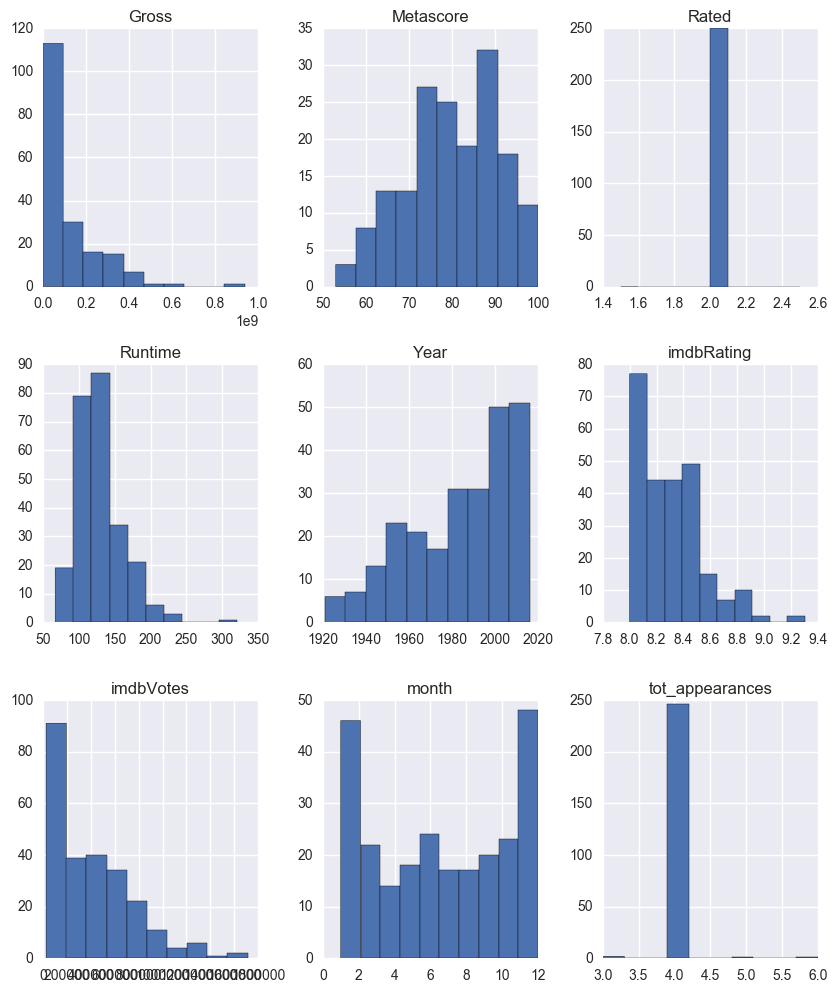

In [328]:

#histograms of short list

dfsh.hist(figsize=(10,12))

In [251]:
#impute na with minimums, assuming Metascore and 
df.fillna(df.min(), inplace=True);


In [140]:
# new list with no nas, needed for pairplots

shorter_cols = ['Rated','Runtime','Year','imdbRating','imdbVotes','tot_appearances']
dfshtr = pd.DataFrame(df[shorter_cols])

ValueError: x and y must be the same size

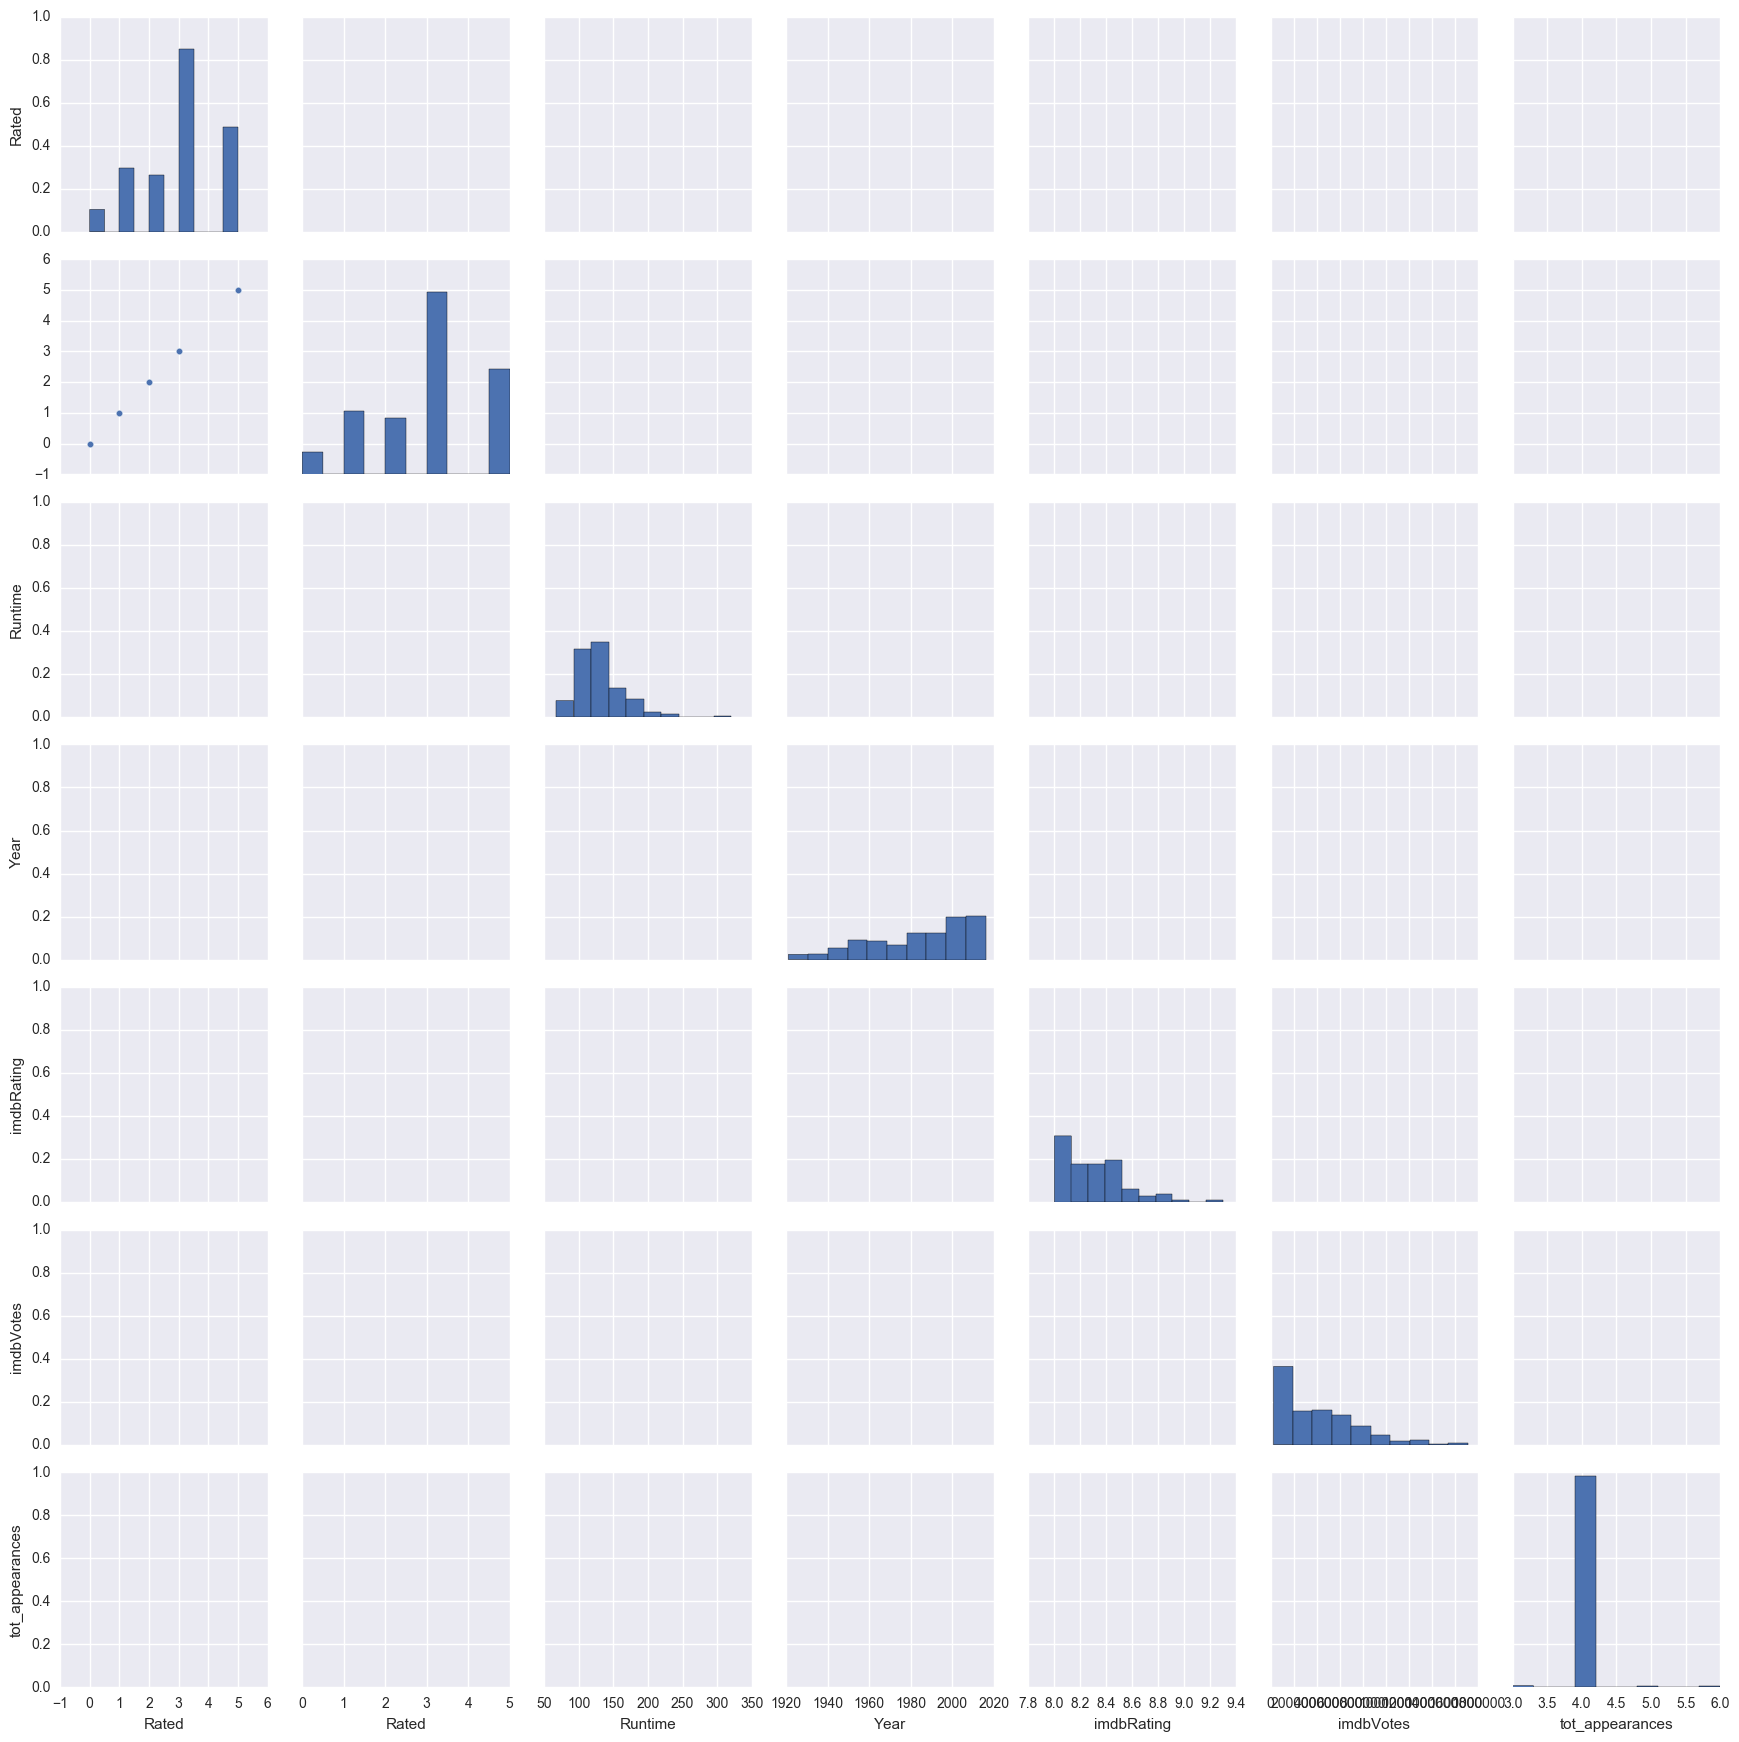

In [141]:
sns.pairplot(dfshtr, kind="scatter")

## Modeling

In [ ]:
# Import additional modules for modeling

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn.preprocessing import Imputer



In [ ]:
X = df[0:]
y = df['imdbRating']


In [ ]:
X.info(10)

In [ ]:
X.pop('imdbRating')

X.pop('imdbID')
X.pop('Title')

dir_dummy = pd.get_dummies(X['Director'], prefix='director')
writer_dummy = pd.get_dummies(X['Writer'], prefix='Writer')

X = X.join(dir_dummy)
X = X.join(writer_dummy)
X.pop('Country')
X.pop('Director')
X.pop('Language')
X.pop('Writer');

In [ ]:
X.head()

In [ ]:
# see how many ratings are in the data set

print y.value_counts()
print y.count()

In [59]:
#impute na with medians
X.fillna(X.median(), inplace=True);

In [68]:
# Decision Tree Regressor


cv = KFold(n=X.shape[0], n_folds=5,
 shuffle=True, random_state=43)

dt = DecisionTreeRegressor()

scores = cross_val_score(dt, X, y, cv=cv)

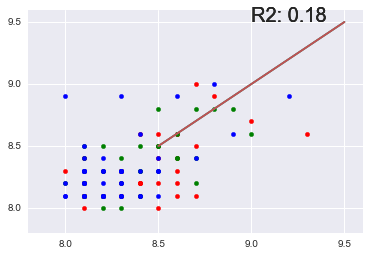

In [69]:
def do_plot(model, m=None):
    for fold, color in zip(cv, ['r', 'g', 'b']):
        X_train = X.iloc[fold[0]]
        X_test  = X.iloc[fold[1]]
        y_train = y.iloc[fold[0]]
        y_test  = y.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        plt.scatter(y_test, y_pred, color=color)
        plt.plot([8.5,9.5],[8.5,9.5])
        plt.text(9,9.5, "R2: "+str(m), fontsize=20, )
        
do_plot(dt, scores.mean().round(2))

0.26356589147286813

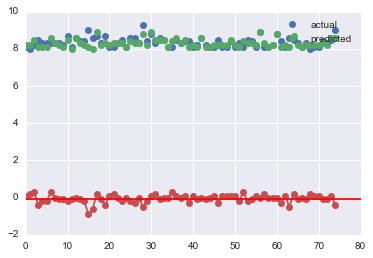

In [139]:
dt2 = make_pipeline(Imputer(),
                   DecisionTreeRegressor())

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=43)
dt2.fit(X_train, y_train)


y_pred = dt2.predict(X_test)

plt.plot(y_test.values, 'o')
plt.plot(y_pred, 'o')
plt.legend(['actual', 'predicted'])

resid = y_pred - y_test.values
plt.plot(resid, 'o-')
plt.axhline(resid.mean(), color = 'r')


r2_score(y_test, y_pred)




In [70]:
# Random Forest Regressor

rf = RandomForestRegressor()
rf.fit(X,y)
scores = cross_val_score(rf, X, y, cv=cv)
scores

array([ 0.43081461,  0.4552176 ,  0.31424236,  0.57902476,  0.45387013])

In [71]:
importances = rf.feature_importances_

In [72]:
# check predictive power of features

predictor_var = X.columns.tolist()

features = pd.Series(importances, index = predictor_var).sort_values(ascending = False)
features





imdbVotes                                                                                                                                                                                                             0.505496
Year                                                                                                                                                                                                                  0.068788
Runtime                                                                                                                                                                                                               0.044923
Gross                                                                                                                                                                                                                 0.038564
Metascore                                                                                                   

In [125]:
fil_cols = ['Metascore','Runtime','Gross']
X3 = pd.DataFrame(X2[fil_cols])
X3

,Metascore,Runtime,Gross
0,88.0,107,13092000.0
1,98.0,207,269061.0
2,85.0,115,242374454.0
3,5.0,161,27200000.0
4,69.0,143,623279547.0
5,76.0,156,183635922.0
6,75.0,101,89594.0
7,5.0,131,5.0
8,5.0,110,5.0
9,90.0,100,380838870.0


In [129]:
# Decision Tree Regressor


cv = KFold(n=X3.shape[0], n_folds=5,
 shuffle=True, random_state=43)

dt = DecisionTreeRegressor()

scores = cross_val_score(dt, X3, y, cv=cv)

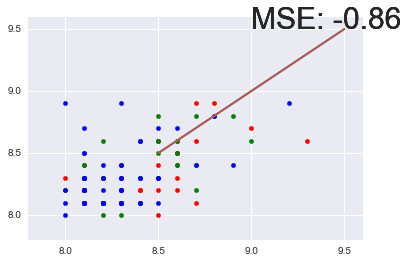

In [132]:
def do_plot(model, m=None):
    for fold, color in zip(cv, ['r', 'g', 'b']):
        X_train = X.iloc[fold[0]]
        X_test  = X.iloc[fold[1]]
        y_train = y.iloc[fold[0]]
        y_test  = y.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        plt.scatter(y_test, y_pred, color=color)
        plt.plot([8.5,9.5],[8.5,9.5])
        plt.text(9,9.5, "MSE: "+str(m), fontsize=30, )
        
do_plot(dt, scores.mean().round(2))

-0.52906976744186163

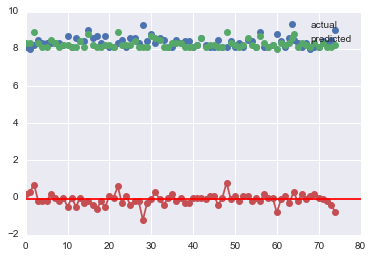

In [140]:
dt2 = make_pipeline(Imputer(),
                   DecisionTreeRegressor())

X_train, X_test, y_train, y_test, = train_test_split(X3, y, test_size=0.3, random_state=43)
dt2.fit(X_train, y_train)


y_pred = dt2.predict(X_test)

plt.plot(y_test.values, 'o')
plt.plot(y_pred, 'o')
plt.legend(['actual', 'predicted'])

resid = y_pred - y_test.values
plt.plot(resid, 'o-')
plt.axhline(resid.mean(), color = 'r')


r2_score(y_test, y_pred)




In [126]:
# Random Forest Regressor

rf = RandomForestRegressor()
rf.fit(X3,y)
scores = cross_val_score(rf, X3, y, cv=cv)
scores

array([-0.37082564,  0.19835429, -0.26523657, -0.21117713, -0.57421697])

In [127]:
importances = rf.feature_importances_

predictor_var = X3.columns.tolist()

features = pd.Series(importances, index = predictor_var).sort_values(ascending = False)
features

Runtime      0.386967
Gross        0.329474
Metascore    0.283559
dtype: float64

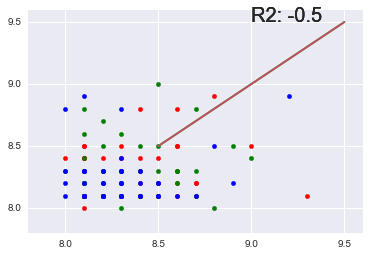

In [77]:
# Decision Tree Regressor Redux

cv = KFold(n=X2.shape[0], n_folds=5,
 shuffle=True, random_state=43)


dt = DecisionTreeRegressor()

scores = cross_val_score(dt, X2, y, cv=cv)

def do_plot(model, m=None):
    for fold, color in zip(cv, ['r', 'g', 'b']):
        X_train = X2.iloc[fold[0]]
        X_test  = X2.iloc[fold[1]]
        y_train = y.iloc[fold[0]]
        y_test  = y.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        plt.scatter(y_test, y_pred, color=color)
        plt.plot([8.5,9.5],[8.5,9.5])
        plt.text(9,9.5, "R2: "+str(m), fontsize=20, )
        
do_plot(dt, scores.mean().round(2))

In [78]:
# Random Forest Regressor

rf = RandomForestRegressor()
rf.fit(X2,y)
scores = cross_val_score(rf, X2, y, cv=cv)
scores

array([-0.31297301,  0.07600392, -0.06912979, -0.15615217, -0.04701299])

In [79]:
# check predictive power of features in new set
rf = RandomForestRegressor()
rf.fit(X2,y)
scores = cross_val_score(rf, X2, y, cv=cv)
scores

importances = rf.feature_importances_
predictor_var = X2.columns.tolist()

features = pd.Series(importances, index = predictor_var).sort_values(ascending = False)
features


director_Francis Ford Coppola                                                                                                                                                                                         0.075761
Runtime                                                                                                                                                                                                               0.075178
Gross                                                                                                                                                                                                                 0.070222
Metascore                                                                                                                                                                                                             0.053388
director_Christopher Nolan                                                                                  

In [124]:
X3 = X2[['Runtime','Gross','Metascore']]
X2.info()
# X.head (0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Columns: 1241 entries, Metascore to Writer_Woody Allen, Marshall Brickman
dtypes: float64(396), int32(1), int64(844)
memory usage: 2.4 MB


In [80]:
# Random Forest Regressor

rf = RandomForestRegressor()
rf.fit(X2,y)
scores = cross_val_score(rf, X2, y, cv=cv)
scores

array([-0.25359037, -0.13508305, -0.12075658, -0.20970496, -0.10363636])

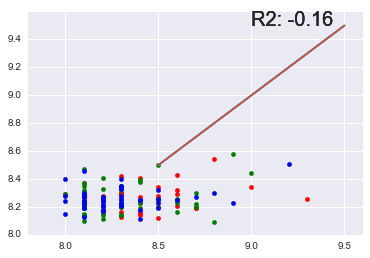

In [81]:
do_plot(rf, scores.mean().round(2))

# ew

In [82]:
# AdaBoost

ab = AdaBoostRegressor()

scores = cross_val_score(ab, X2, y, cv=cv)
scores

array([-0.03229651,  0.1715465 ,  0.01812005,  0.00070174,  0.02171854])

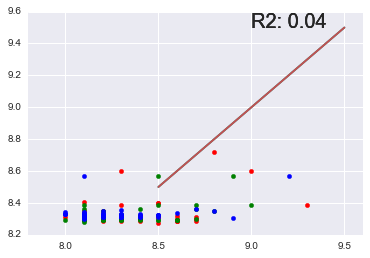

In [83]:
do_plot(ab, scores.mean().round(2))

# why are these so awful?

In [84]:
# Gradient Boost

gb = GradientBoostingRegressor()

scores = cross_val_score(gb, X2, y, cv=cv)
scores

array([-0.02878964,  0.12207997,  0.02236935, -0.01564565, -0.1068086 ])

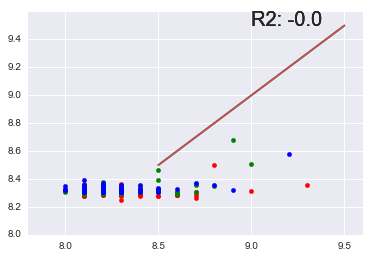

In [85]:
do_plot(ab, scores.mean().round(2))

# ?!?

In [86]:
print y.value_counts()
print y.count()

8.1    70
8.3    44
8.2    44
8.4    25
8.5    24
8.6    15
8.7     7
8.0     7
8.8     5
8.9     5
9.0     2
9.2     1
9.3     1
Name: imdbRating, dtype: int64
250


In [ ]:
# # Cannot do model comparison with y<2 so creating new DBs without the two occurrances of ratings with only 1 record
Xn = pd.concat([X, y], axis = 1)

Xn = Xn[Xn.imdbRating < 9.1]

yn = Xn['imdbRating']

Xn.pop('imdbRating');

In [ ]:
# verify 2 rows are gone

yn.count()

In [ ]:
# Create evaluation tool


X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size=0.3, random_state=42, stratify=yn)

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    print cm
    print cr
    
    return a

all_models = {}

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
all_models['lr'] = {'model': lr,
                    'score': evaluate_model(lr)}